In [1]:
from roc import ROC
import pandas as pd
import os

Seed: 0


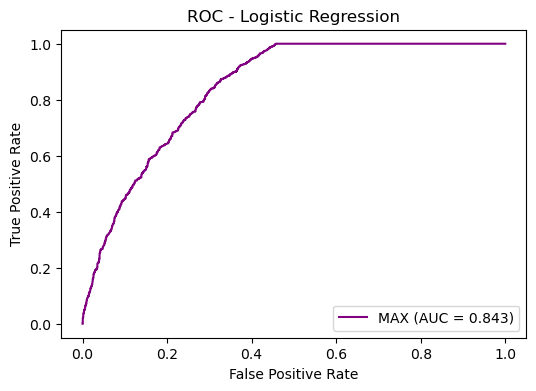

Seed: 0


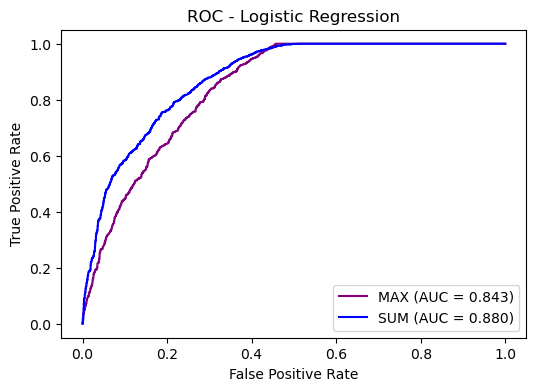

Seed: 0


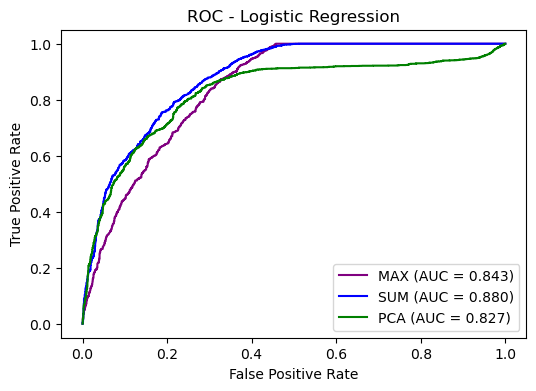

Seed: 0


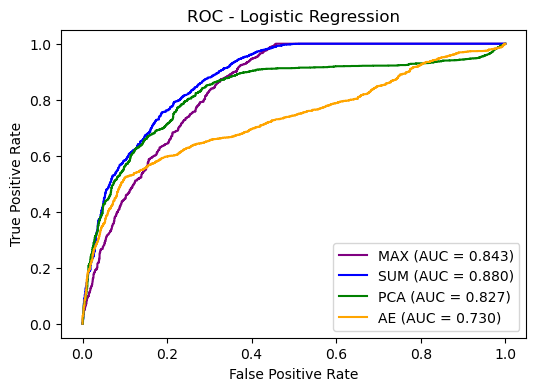

Seed: 0


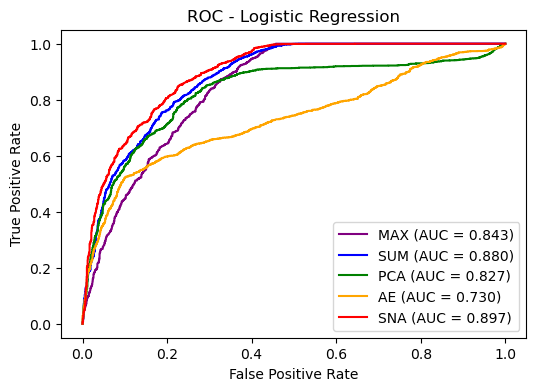

Seed: 1


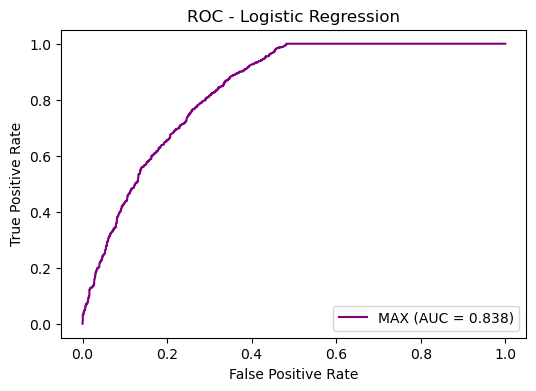

Seed: 1


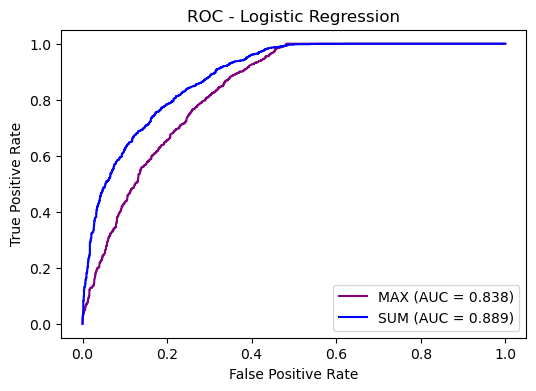

Seed: 1


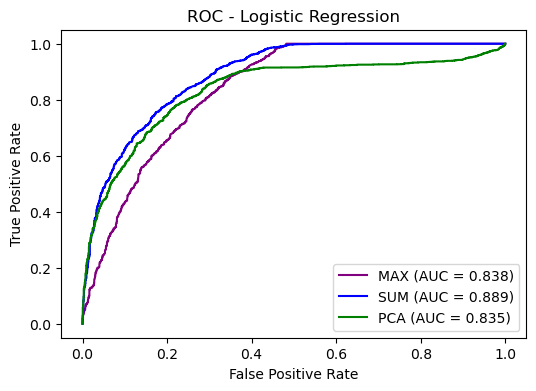

Seed: 1


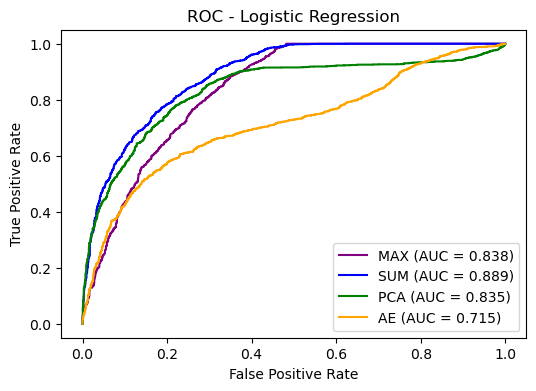

Seed: 1


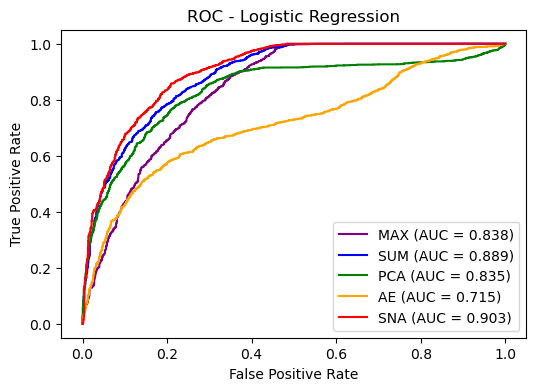

Seed: 0


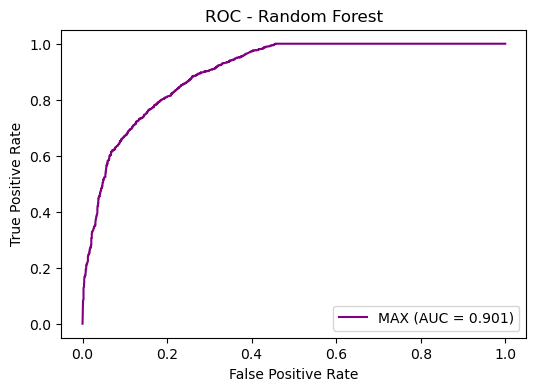

Seed: 0


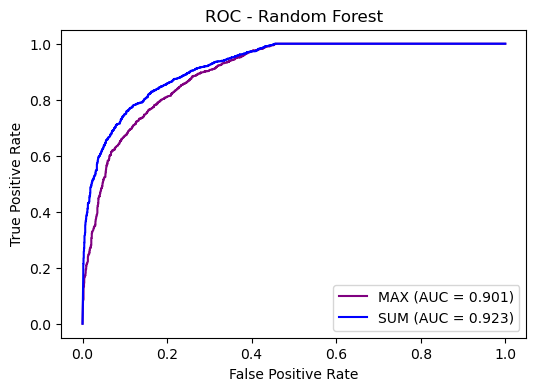

Seed: 0


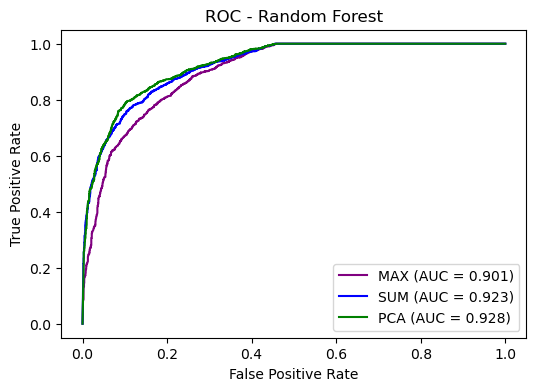

Seed: 0


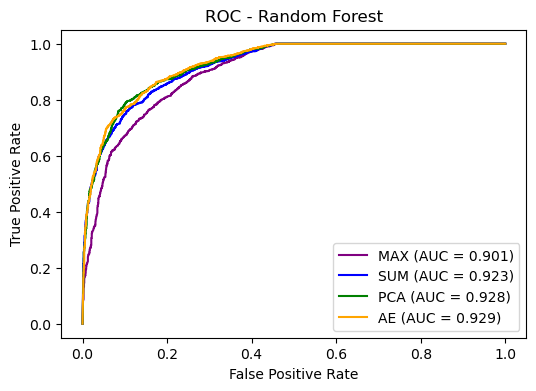

Seed: 0


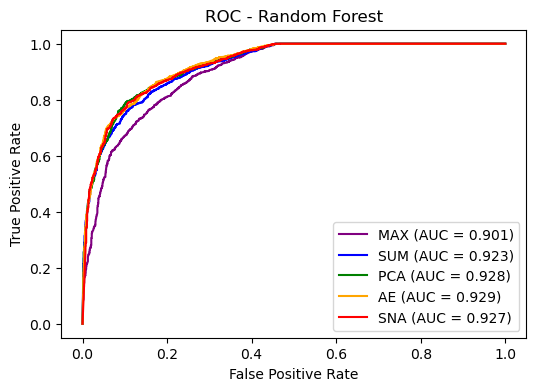

Seed: 0


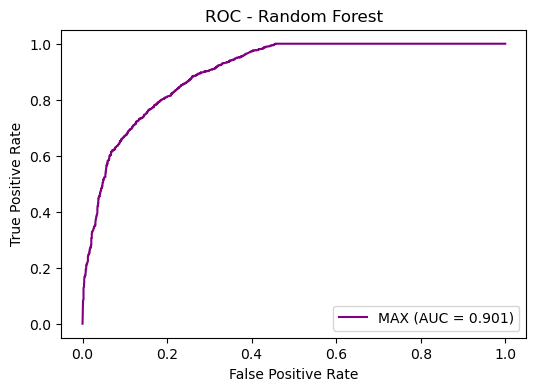

Seed: 0


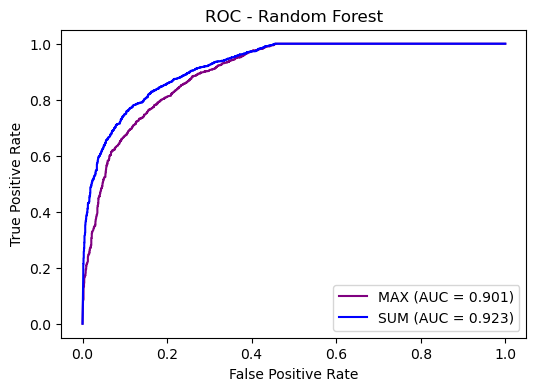

Seed: 0


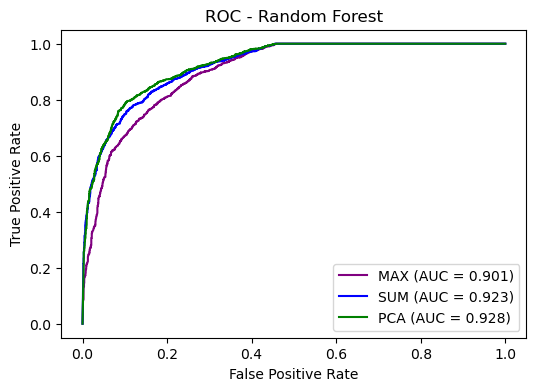

Seed: 0


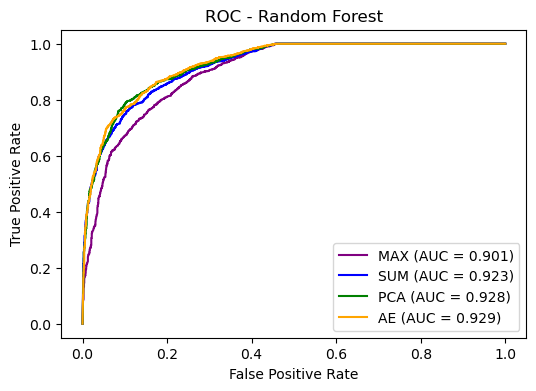

Seed: 0


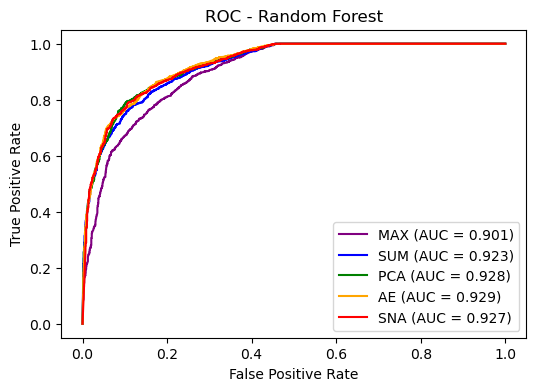

Seed: 0


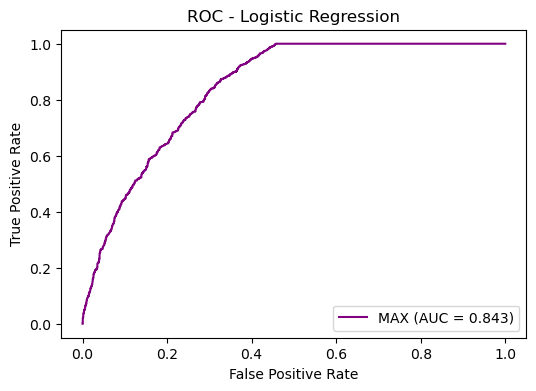

Seed: 0


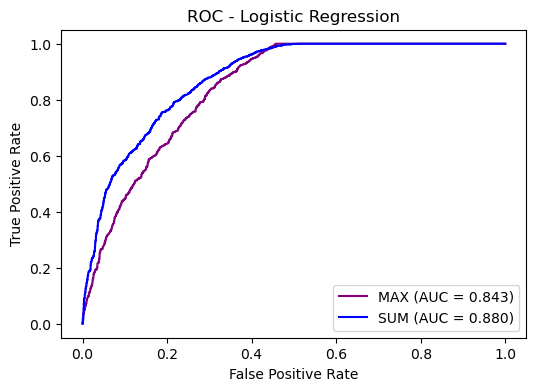

Seed: 0


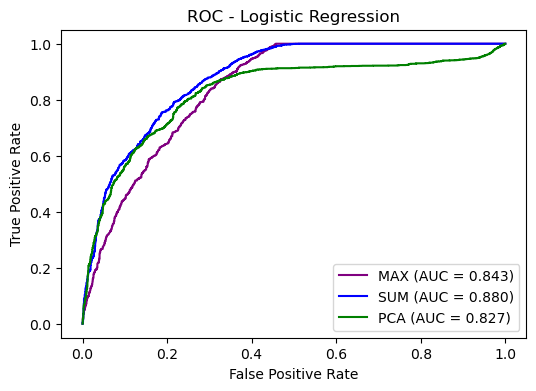

Seed: 0


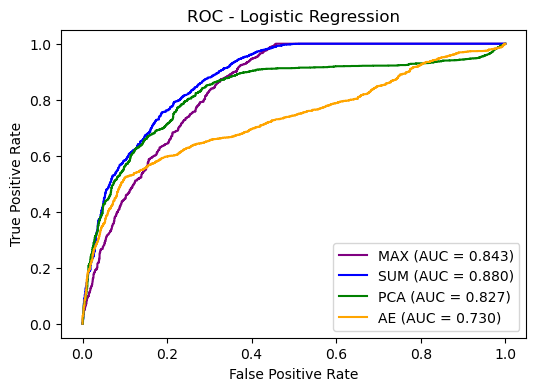

Seed: 0


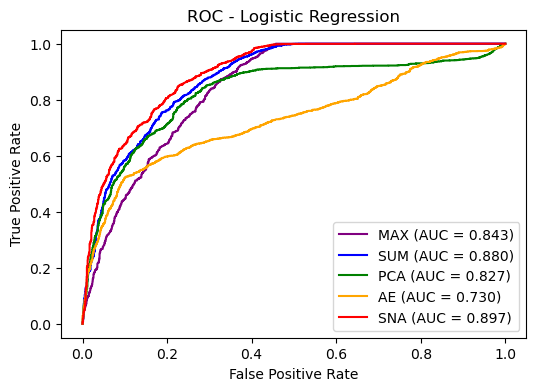

Seed: 1


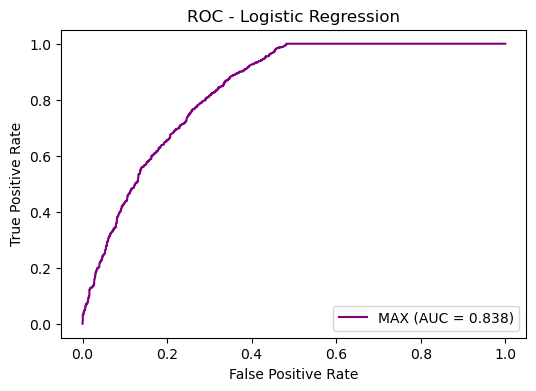

Seed: 1


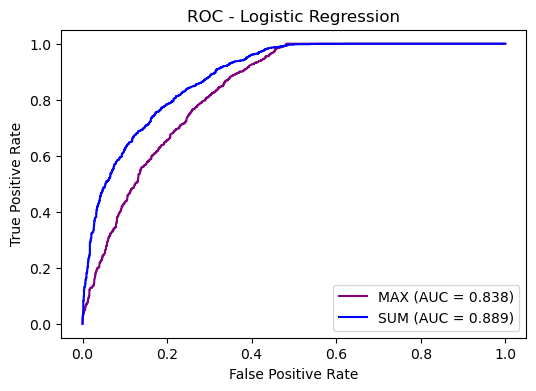

Seed: 1


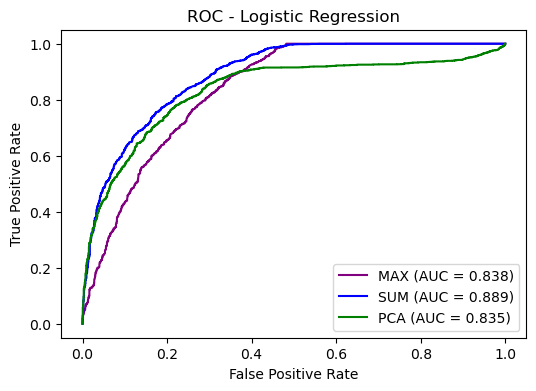

Seed: 1


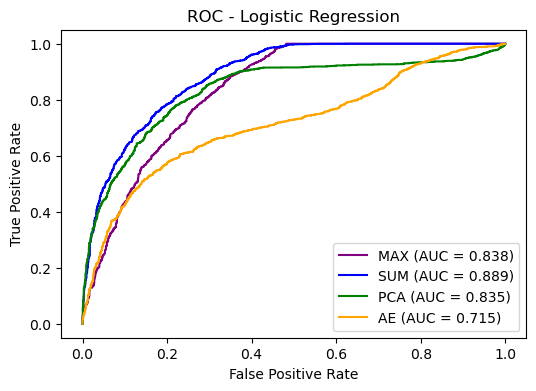

Seed: 1


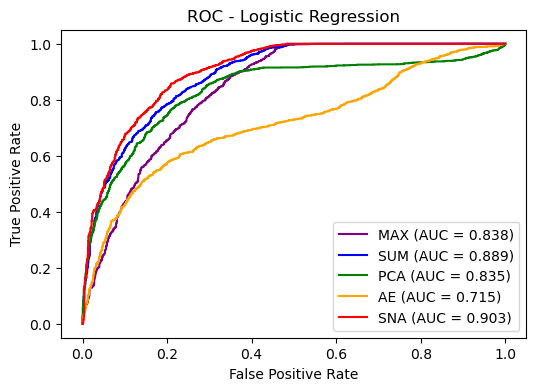

In [2]:
roc_files = [f for f in os.listdir('data/roc/') if len(f)==13]
method = ["MAX","SUM","PCA","AE","SNA"]

roc_files = os.listdir('data/roc/')
for roc_file in roc_files:
    clf = roc_file[:2]
    seed = roc_file[-5:-4]
    Y_scores = pd.read_csv(f'data/roc/{clf}_scores_{seed}.csv')
    Y_true = pd.read_csv(f'data/roc/{clf}_true_{seed}.csv')
    Y_scores = Y_scores.values.tolist()
    Y_true = Y_true.values.tolist()
    # for presentation
    for num_method in range(1, 6):
        ROC(Y_true, Y_scores, method[:num_method], clf, seed)